In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import classification_report, confusion_matrix

In [2]:
tf.random.set_seed(100)

In [3]:
data = pd.read_csv('/kaggle/input/120-years-of-olympic-history-athletes-and-results/athlete_events.csv')


In [4]:
data

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [6]:
data['Medal'] = data['Medal'].apply(lambda x: 1 if str(x) != 'nan' else 0)

In [7]:
data = data.drop(['ID', 'Name', 'Games'], axis = 1)

In [8]:
data

,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
2,M,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,0
3,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,1
4,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0
...,...,...,...,...,...,...,...,...,...,...,...,...
271111,M,29.0,179.0,89.0,Poland-1,POL,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,0
271112,M,27.0,176.0,59.0,Poland,POL,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",0
271113,M,27.0,176.0,59.0,Poland,POL,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",0
271114,M,30.0,185.0,96.0,Poland,POL,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,0


In [9]:
data.isna().sum()

Sex           0
Age        9474
Height    60171
Weight    62875
Team          0
NOC           0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal         0
dtype: int64

In [10]:
data.groupby(['Medal', 'Sex']).mean().astype(int)

Age  Height  Weight  Year
Medal Sex                           
0     F     23     167      59  1992
      M     26     178      75  1974
1     F     24     170      63  1992
      M     26     181      79  1966

In [11]:
data.groupby(['Medal', 'Sex'])['Age'].mean().astype(int)

Medal  Sex
0      F      23
       M      26
1      F      24
       M      26
Name: Age, dtype: int64

In [12]:
for column in ['Age', 'Height', 'Weight']:
    data[column] = data.groupby(['Medal', 'Sex'])[column].apply(lambda x: x.fillna(x.mean()).astype(int))

In [13]:
data

,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,M,24,180,80,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,M,23,170,60,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
2,M,24,178,75,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,0
3,M,34,181,79,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,1
4,F,21,185,82,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0
...,...,...,...,...,...,...,...,...,...,...,...,...
271111,M,29,179,89,Poland-1,POL,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,0
271112,M,27,176,59,Poland,POL,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",0
271113,M,27,176,59,Poland,POL,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",0
271114,M,30,185,96,Poland,POL,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,0


In [14]:
{column: len(data[column].unique()) for column in data.select_dtypes('object').columns}

{'Sex': 2,
 'Team': 1184,
 'NOC': 230,
 'Season': 2,
 'City': 42,
 'Sport': 66,
 'Event': 765}

In [15]:
def binary_encode(df, columns, positive_values):
    df = df.copy()
    for column, positive_value in zip(columns, positive_values):
        df[column] = df[column].apply(lambda x: 1 if x == positive_value else 0)
    return df

In [16]:
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix = prefix)
        df = pd.concat([df, dummies], axis = 1)
        df = df.drop(column, axis = 1)
    return df

In [17]:
data = binary_encode(
    data,
    columns = ['Sex', 'Season'],
    positive_values = ['M', 'Summer']
)

data = onehot_encode(
    data,
    columns = ['Team', 'NOC', 'City', 'Sport', 'Event'],
    prefixes = ['T', 'N', 'C', 'S', 'E']
)

In [18]:
len(data.select_dtypes('object').columns)

0

In [19]:
data

,Sex,Age,Height,Weight,Year,Season,Medal,T_30. Februar,T_A North American Team,T_Acipactli,...,"E_Wrestling Men's Super-Heavyweight, Greco-Roman","E_Wrestling Men's Unlimited Class, Greco-Roman","E_Wrestling Men's Welterweight, Freestyle","E_Wrestling Men's Welterweight, Greco-Roman","E_Wrestling Women's Featherweight, Freestyle","E_Wrestling Women's Flyweight, Freestyle","E_Wrestling Women's Heavyweight, Freestyle","E_Wrestling Women's Light-Heavyweight, Freestyle","E_Wrestling Women's Lightweight, Freestyle","E_Wrestling Women's Middleweight, Freestyle"
0,1,24,180,80,1992,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,23,170,60,2012,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,24,178,75,1920,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,34,181,79,1900,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,21,185,82,1988,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,1,29,179,89,1976,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271112,1,27,176,59,2014,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271113,1,27,176,59,2014,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271114,1,30,185,96,1998,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
corr = data.loc[:, :"Medal"].corr()

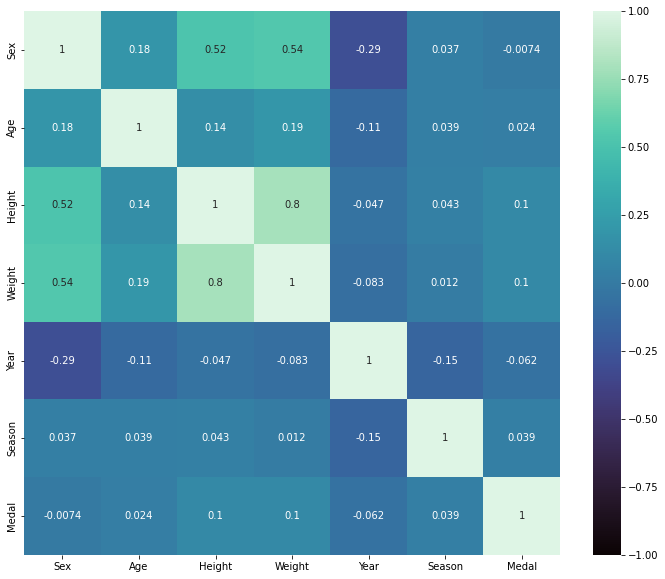

In [21]:
plt.figure(figsize = (12, 10))
sns.heatmap(corr, annot = True, vmin = -1.0, cmap = 'mako')
plt.show()

In [22]:
y = data['Medal'].copy()
X = data.drop('Medal', axis = 1).copy()

In [23]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state = 100)

In [25]:
X.shape

(271116, 2293)

In [28]:
inputs = tf.keras.Input(shape = (X.shape[1]))
x = tf.keras.layers.Dense(64, activation = 'relu')(inputs)
x = tf.keras.layers.Dense(64, activation = 'relu')(x)
outputs = tf.keras.layers.Dense(1, activation = 'sigmoid')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = [
        'accuracy',
        tf.keras.metrics.AUC(name = 'auc')
    ]
)

history = model.fit(
    X_train,
    y_train,
    validation_split = 0.2,
    batch_size = 32,
    epochs = 100,
    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor = 'val_loss',
            patience = 3,
            restore_best_weights = True
       
        )
    ]
)

Epoch 1/100
4745/4745 [==============================] - 18s 4ms/step - loss: 0.3318 - accuracy: 0.8731 - auc: 0.8035 - val_loss: 0.2960 - val_accuracy: 0.8881 - val_auc: 0.8429
Epoch 2/100
4745/4745 [==============================] - 18s 4ms/step - loss: 0.2749 - accuracy: 0.8954 - auc: 0.8680 - val_loss: 0.2736 - val_accuracy: 0.8983 - val_auc: 0.8659
Epoch 3/100
4745/4745 [==============================] - 18s 4ms/step - loss: 0.2456 - accuracy: 0.9079 - auc: 0.8950 - val_loss: 0.2598 - val_accuracy: 0.9051 - val_auc: 0.8806
Epoch 4/100
4745/4745 [==============================] - 17s 4ms/step - loss: 0.2235 - accuracy: 0.9165 - auc: 0.9138 - val_loss: 0.2465 - val_accuracy: 0.9115 - val_auc: 0.8904
Epoch 5/100
4745/4745 [==============================] - 19s 4ms/step - loss: 0.2057 - accuracy: 0.9232 - auc: 0.9271 - val_loss: 0.2439 - val_accuracy: 0.9153 - val_auc: 0.8921
Epoch 6/100
4745/4745 [==============================] - 17s 4ms/step - loss: 0.1917 - accuracy: 0.9281 - auc:

In [30]:
model.evaluate(X_test, y_test)

2542/2542 [==============================] - 5s 2ms/step - loss: 0.2375 - accuracy: 0.9184 - auc: 0.9012


[0.23745675384998322, 0.9184114933013916, 0.9012426733970642]

In [31]:
y_true = np.array(y_test)
y_pred = np.squeeze(np.array(model.predict(X_test) >= 0.5, dtype = np.int))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [41]:
print("Classification Report: \n----------------------\n",classification_report(y_true, y_pred))

Classification Report: 
----------------------
               precision    recall  f1-score   support

           0       0.93      0.98      0.95     69458
           1       0.82      0.56      0.67     11877

    accuracy                           0.92     81335
   macro avg       0.88      0.77      0.81     81335
weighted avg       0.91      0.92      0.91     81335



In [43]:
print("Confusion Matrix: \n-----------------\n",confusion_matrix(y_true, y_pred))

Confusion Matrix: 
-----------------
 [[68045  1413]
 [ 5223  6654]]
